# Afiniczne Ciągłe Automaty Komórkowe (ACCAs)

Wykład: https://github.com/houp/ca-class/blob/main/slides/lecture7.pdf

## Importy

In [1]:
import math
import random
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Poly
from joblib import Parallel, delayed

## zad.13
Napisz program, który dla zadanego LUT (binarnego) oraz cLUT (real-valued) wygeneruje wielomian odpowiadający CA / ACCA.

Wersja dla normalnych ludzi: zakładamy, że promień sąsiedztwa = 1.

Wersja z (*): piszemy ogólny program dla dowolnego promienia sąsiedztwa.

Tak czy inaczej do napisania jest funkcja:\
**get_ca_polynomial(lut)** -> polynomial

Użyj SymPy lub podobnej biliboteki do operacji na wielomianach.

In [2]:
# tak powinno wyglądać dla reguły 232
x, y, z = symbols('x y z')
polynomial = 1*x*y*z + 1*x*y*(1-z) + 1*x*(1-y)*z + 0*x*(1-y)*(1-z) + 1*(1-x)*y*z + 0*(1-x)*y*(1-z) + 0*(1-x)*y*(1-z) + 0*(1-x)*(1-y)*(1-z)
polynomial

x*y*z + x*y*(1 - z) + x*z*(1 - y) + y*z*(1 - x)

In [3]:
def get_ca_polynomial(lut: np.ndarray) -> Poly:
    x, y, z = symbols('x y z')
    polynomial = (lut[0]*x*y*z + lut[1]*x*y*(1-z) + lut[2]*x*(1-y)*z + lut[3]*x*(1-y)*(1-z) +
                  lut[4]*(1-x)*y*z + lut[5]*(1-x)*y*(1-z) + lut[6]*(1-x)*(1-y)*z + lut[7]*(1-x)*(1-y)*(1-z))
    return polynomial


In [4]:
def eca_get_lut(rule_num: int) -> np.ndarray:
    return np.array([int(x) for x in bin(rule_num)[2:].zfill(8)], dtype=np.uint8)


In [5]:
lut = eca_get_lut(232)
get_ca_polynomial(lut)

x*y*z + x*y*(1 - z) + x*z*(1 - y) + y*z*(1 - x)

## zad.14
Korzystając z rozwiązania Zadania 13 oraz z wcześniejszych programów, napisz funkcję, która dla zadanego cLUT i zadanej konfiguracji początkowej generuje space-time diagram ACCA.

**acca_space_time(clut, initial_conf, step)** -> space time diagram w matplotlib

Wskazówka: należy wziąć wielomian i go użyć do obliczenia następnych stanów automatów komórkowych.

In [6]:
# [1,1,1  1,1,0  1,0,1  1,0,0  0,1,1  0,1,0  0,0,1  0,0,0]
clut = np.array([1, 0.1, 1, 0.9, 1, 0, 0, 0])

In [7]:
def acca_evolve(clut: np.ndarray, x: np.ndarray) -> np.ndarray:
    polynomial = get_ca_polynomial(clut)
    x_sym, y_sym, z_sym = symbols('x y z')
    return np.array([float(polynomial.subs({x_sym: xi, y_sym: yi, z_sym: zi})) for xi, yi, zi in zip(np.roll(x, 1), x, np.roll(x, -1))])

def acca_evolve_spacetime(clut: np.ndarray, initial_conf: np.ndarray, steps: int) -> np.ndarray:
    rows = [initial_conf]
    for _ in range(1, steps):
        rows.append(acca_evolve(clut, rows[-1]))
    return np.stack(rows)

def acca_space_time(clut: np.ndarray, initial_conf: np.ndarray, steps: int):
    spacetime = acca_evolve_spacetime(clut, initial_conf, steps)
    plt.figure(figsize=(5, 5))
    plt.imshow(spacetime, cmap='binary', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()


In [10]:
initial_conf = np.random.randint(0,2,49)
initial_conf

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0])

In [11]:
initial_density = sum(initial_conf)/len(initial_conf)
print(f'Initial density: {initial_density}')

Initial density: 0.5306122448979592


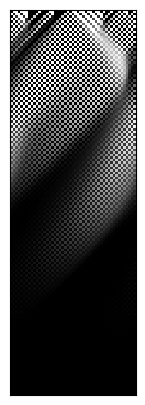

In [15]:
acca_space_time(clut, initial_conf, 150)